## The Sparks Foundation: GRIP AUGUST 2021

#### BY : SAKSHI MOGHA

#### TASK 2 : COLOR IDENTIFICATION IN IMAGES

IMPORT LIBRARIES

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline


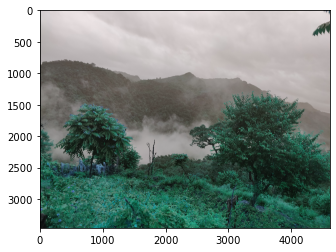

In [2]:
image = cv2.imread('C:\\Users\\Sakshi\\Downloads\\sample_image.jpg')
plt.imshow(image)

We see that the image has different colors as compared to the original image. This is because by default OpenCV reads the images in the color order BLUE GREEN RED i.e. BGR. Thus, we need to convert it into REG GREEN BLUE i.e. RGB.

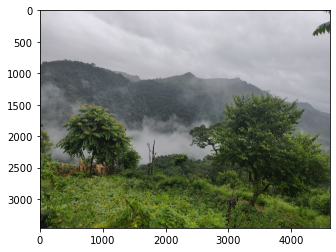

In [3]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

The image can also be converted to grayscale if needed.

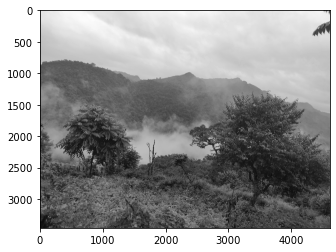

In [4]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

We might want to resize the image to a certain size whenever the images are huge or when we are working with multiple images of different dimensions.

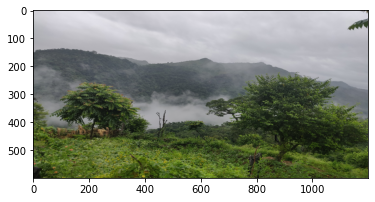

In [5]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

##### Color Identification

In [6]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [7]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [8]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([30.86463865, 39.40513452, 21.52892562]),
 array([179.47923574, 180.06427678, 186.48086645]),
 array([84.13235884, 90.99026626, 92.21936045]),
 array([80.29322065, 98.2125666 , 38.96038949]),
 array([206.54114052, 206.24043949, 213.72127354]),
 array([111.27941565, 126.52849022,  57.78880222]),
 array([55.96014431, 69.05806562, 34.62924469]),
 array([120.97056277, 125.5225974 , 125.58839827])]

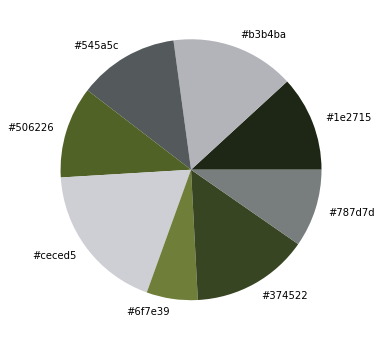

In [10]:
get_colors(get_image('C:\\Users\\Sakshi\\Downloads\\sample_image.jpg'), 8, True)

We Used KMeans Clustering algorithm to extract colors from the images andn displayed the identified colors in form of pie chart.